In [1]:
import pandas as pd
import networkx as nx
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
from pylab import rcParams
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import skfda
from collections import Counter
import pygraphviz as pgv
from pyvis.network import Network
from sklearn import preprocessing
from matplotlib.pyplot import figure
from IPython.display import display

In [2]:
years = range(1990,2022)
for y in years:
    locals()['Gorg' + str(y)] = nx.read_gpickle(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\orgorg4\orgorg4_single' +
                                               str(y) +
                                               '.gpickle')
    print(y)

1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [3]:
years = range(1994,2021)
for y in years:
    locals()['Gbid' + str(y)] = nx.read_gpickle(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\bidbid_stage_self_single\bidbid_stage_self_single_' +
                                               str(y) +
                                               '.gpickle')
    print(y)

1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


In [6]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def hypergeom_pmf(N, A, n, x):
    
    '''
    Probability Mass Function for Hypergeometric Distribution
    :param N: population size
    :param A: total number of desired items in N
    :param n: number of draws made from N
    :param x: number of desired items in our draw of n items
    :returns: PMF computed at x
    '''
    Achoosex = comb(A,x)
    NAchoosenx = comb(N-A, n-x)
    Nchoosen = comb(N,n)
    
    return (Achoosex)*NAchoosenx/Nchoosen

In [5]:
def hypergeom_cdf(N, A, n, t, min_value=None):
    
    '''
    Cumulative Density Funtion for Hypergeometric Distribution
    :param N: population size
    :param A: total number of desired items in N
    :param n: number of draws made from N
    :param t: number of desired items in our draw of n items up to t
    :returns: CDF computed up to t
    '''
    if min_value:
        return np.sum([hypergeom_pmf(N, A, n, x) for x in range(min_value, t+1)])
    
    return np.sum([hypergeom_pmf(N, A, n, x) for x in range(t+1)])

In [6]:
def plot_degree_dist(G):
    hist = nx.degree_histogram(G)
    q = [w+1 for w in hist]
    q = np.log(q[1:])
    
    plt.subplot(7,3, y-2000)
    x = np.log(range(1, len(hist)))
    plt.plot(x, q, ".")
    plt.title(str(y))
    
    #plt.loglog()
    m, b = np.polyfit(x, q, 1)
    plt.plot(x, m*x + b)
    #print(y)
    #print(m)
    #print(' ')

In [25]:
def get_succ(status):
    if status == 'Acquired':
        return 1
    if status == 'Alive / Active':
        return 0
    if status == 'IPO / Went public':
        return 1
    if status == 'Merged':
        return 1
    if isinstance(status, float):
        if np.isnan(status):
            return np.nan
    else:
        return 0
    
    


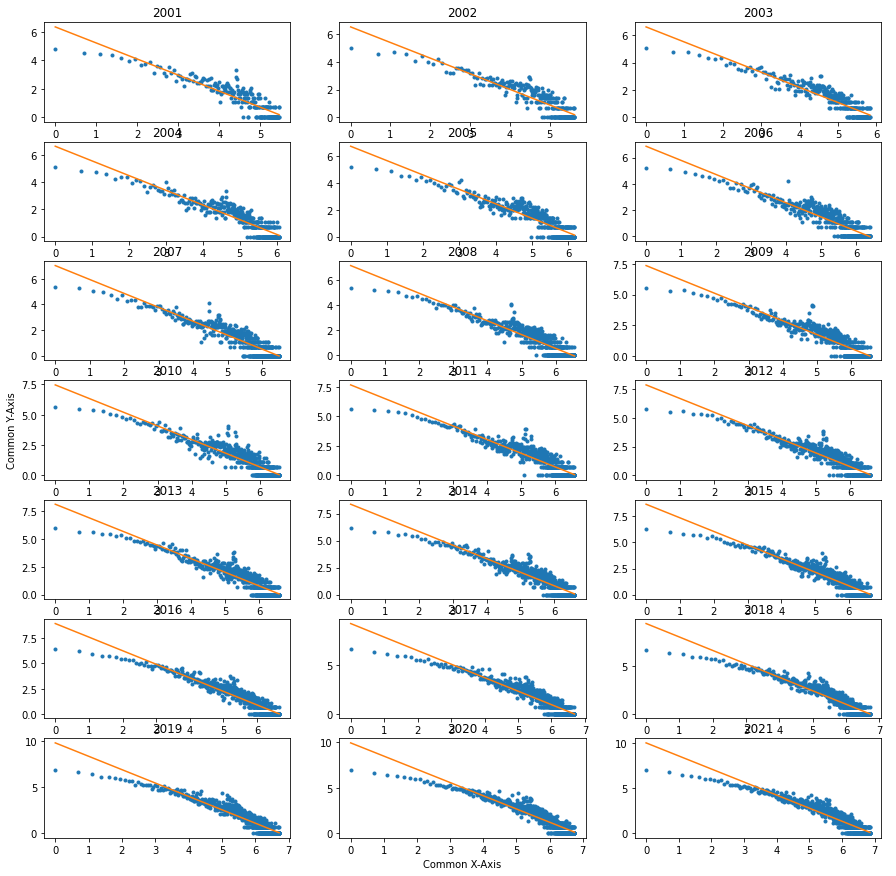

In [8]:
f, axs = plt.subplots(7,3,figsize=(15,15), sharex=True, sharey=True)

for y in range(2001,2022):
    plot_degree_dist(locals()['Gorg' + str(y)])
f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("Common X-Axis")
plt.ylabel("Common Y-Axis")
plt.show()

In [ ]:
orgs.columns

# Definizione Classica

In [4]:
cb1 = pd.read_csv('cb1.csv')
cb2 = pd.read_csv('cb2.csv')
cb3 = pd.read_csv('cb3.csv')
cb = cb1.append(cb2)
cb = cb.append(cb3)
cb.index = range(len(cb))
cb['date_my'] = (pd.to_datetime(cb['date'],format='%m/%d/%Y', errors='coerce')).dt.to_period('m')
cb['date_y'] = (pd.to_datetime(cb['date'],format='%m/%d/%Y', errors='coerce')).dt.to_period('y')

nodes_org = cb[['target_name', 'target_ID', 'target_country', 'target_continent', 'industry', 'target_founded']].drop_duplicates()
nodes_org['bipartite'] = 1
nodes_inv = cb[['investors_name', 'investor_id', 'investor_country', 'investor_continent', 'investor_type', 'investor_founded']].drop_duplicates()
nodes_org = nodes_org.rename(columns={"target_name": "node", "target_country": "country", 
                                      "target_continent": "continent", "industry":"industry",
                                     "target_ID":"index", 'target_founded':'foundation'})
nodes_inv = nodes_inv.rename(columns={"investors_name": "node","investor_country": "country", 
                                      "investor_continent": "continent", "investor_type":"industry","investor_id":'index', 'investor_founded':'foundation' })
nodes_inv['bipartite'] = 0
nodes = nodes_org.append(nodes_inv, ignore_index= True)
nodes['id'] = nodes.index

numbers = cb.groupby(['target_name','stage'], as_index = False).count()[['target_name','stage','investors_name']].rename(columns={"investors_name": "investor_numbers"})
cb_new = pd.merge(cb, numbers,  how='left', left_on=['target_name','stage'], right_on = ['target_name','stage'])
cb_new = pd.merge(cb_new, nodes[nodes['bipartite']== 1],  how='left', left_on=['target_name','target_ID'], right_on = ['node','index'])
cb_new = pd.merge(cb_new, nodes[nodes['bipartite']== 0],  how='left', left_on=['investors_name','investor_id'], right_on = ['node','index'])


In [2]:
def get_status(rounds):
    a = list()
    for i in rounds:
        indice = stage.index(i)
        a.append(stato[indice])
    return a
    
    


In [7]:
stati = cb_new.groupby('id_x')
stati2 = stati.tail(1).reset_index(drop=True)
stati3 = stati2[stati2["date"].notna()]

stati2[stati2["target_status"] == "Merged"].drop_duplicates()[["target_name","round_simp","target_status", "date"]]
fun_status = stati2[["round_simp", "target_status"]].groupby(['round_simp', "target_status"]).size().unstack(fill_value=0)[1:61]
fun_status.T.index.values

fun_status.mode()['Dead / Inactive']
stage = list(fun_status.idxmax(axis=1).index)
stage.append("Acq - P2P")

stato = list(fun_status.idxmax(axis=1))
stato.append("Acquired")

set(stato)
#robustness nel passare degli anni

{'Acquired',
 'Alive / Active',
 'Assets Purchased',
 'Dead / Inactive',
 'IPO / Went public',
 'Merged'}

In [13]:
df = cb_new
df['date_y']=df['date_y']#.dt.year
df = df[df['date_y']>0]
#df = df[df['size_real']>0]
#df = df[df['target_founded']>0]
ids = set(df['id_x'])

company = list(ids)

for i in range(5,13):
    locals()['status'+ str(i)] = []

for i in tqdm(ids):
    sub = df[df['id_x']== i][['id_x', 'date_y', 'round_simp','target_founded']]
    for l in reversed(range(5,13)):
        try:
            sub = sub[(sub['date_y']<sub['date_y'].values[0]+l) & (sub['date_y'].values[0] < 2022-l)] #subsetto
            sub1 = sub.tail(1)
        #company.append(i)
        except:
            pass
        roun = sub1['round_simp']
        locals()['status'+ str(l)].append(get_status(roun)) #appendo
    if i % 1000 ==0:
        print(i)

    
    
    

  0%|          | 0/46824 [00:00<?, ?it/s]

0
1000
2000
3000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000


In [15]:
for i in range(5,13):
    locals()['stati'+str(i)] = [x[0] if len(x) >= 1 else np.nan for x in locals()['status'+ str(i)]]

In [16]:
Counter(stati8)

Counter({'IPO / Went public': 1107,
         'Alive / Active': 7003,
         'Acquired': 2266,
         nan: 36205,
         'Dead / Inactive': 75,
         'Merged': 108,
         'Assets Purchased': 60})

In [17]:
dicts = {}
dicts['id']=company
for i in range(5,13):
        dicts['st'+str(i)] = locals()['stati'+str(i)]

In [18]:
df_stati = pd.DataFrame(dicts)

### Most important

In [19]:
bidders = pd.read_csv(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\Covariate_bidbid_final_final2.csv') # <-- relative path
orgs = pd.read_csv(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\Covariates_orgorg_final2.csv') # <-- relative path


In [20]:
nodes = pd.read_csv(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\nodes.csv') # <-- relative path
covariates = pd.read_csv(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all\covariates.csv')

In [21]:
bidders = pd.merge(bidders, nodes, on = 'id')
orgs = pd.merge(orgs,nodes, on = 'id')

In [22]:
orgs2 = pd.merge(orgs, covariates, on = 'id')

In [146]:
covariates.columns

Index(['Unnamed: 0', 'node', 'country', 'continent', 'industry', 'foundation',
       'sector', 'stage', 'first_money', 'date', 'current_sit', 'bipartite',
       'id', 'deg_max', 'deg_min', 'deg_median', 'voterank_max',
       'voterank_min', 'voterank_median', 'clustering_max', 'clustering_min',
       'clustering_median', 'harmonic_centrality_max',
       'harmonic_centrality_min', 'harmonic_centrality_median',
       'closeness_centrality_max', 'closeness_centrality_min',
       'closeness_centrality_median', 'newman_betweenness_centrality_max',
       'newman_betweenness_centrality_min',
       'newman_betweenness_centrality_median', 'pagerank_max', 'pagerank_min',
       'pagerank_median', 'betweenness_centrality_max',
       'betweenness_centrality_min', 'betweenness_centrality_median',
       'eigenvector_centrality_max', 'eigenvector_centrality_min',
       'eigenvector_centrality_median', 'average_neighbor_degree_max',
       'average_neighbor_degree_min', 'average_neighbor_d

In [23]:
bonav = covariates#[covariates.date < covariates.foundation +3]

In [26]:
succ = []
for i in range(0, len(bonav)):
    succ.append(get_succ(bonav.iloc[i,:]['current_sit']))

In [27]:
outcome = list(set(bonav['current_sit']))
success = [get_succ(x) for x in outcome]

df_s = pd.DataFrame({'current_sit': outcome, 'success' : success})
bonav2 = pd.merge(bonav, df_s, on = 'current_sit')
bonav3 = pd.merge(bonav2, df_stati, on = 'id')

for l in range(5,13):
    locals()['succ'+str(l)]= []
    for i in tqdm(range(0,len(bonav3))):
        locals()['succ'+str(l)].append(get_succ(bonav3.iloc[i,:]['st' +str(l)]))

  0%|          | 0/15178 [00:00<?, ?it/s]

  0%|          | 0/15178 [00:00<?, ?it/s]

  0%|          | 0/15178 [00:00<?, ?it/s]

  0%|          | 0/15178 [00:00<?, ?it/s]

  0%|          | 0/15178 [00:00<?, ?it/s]

  0%|          | 0/15178 [00:00<?, ?it/s]

  0%|          | 0/15178 [00:00<?, ?it/s]

  0%|          | 0/15178 [00:00<?, ?it/s]

In [28]:
for y in range(1995,2022):
    print(y, " ", len(bonav[bonav.foundation == y]))

1995   58
1996   102
1997   146
1998   161
1999   256
2000   396
2001   332
2002   295
2003   265
2004   296
2005   274
2006   280
2007   252
2008   227
2009   234
2010   263
2011   364
2012   372
2013   439
2014   571
2015   614
2016   461
2017   215
2018   14
2019   11
2020   4
2021   0


In [29]:
for i in range(5,13):
    bonav3['succ'+str(i)] = locals()['succ'+str(i)]

In [30]:
q = bonav3#[bonav3['foundation']>1995]
for i in list(range(5,13)):
    a = list(q['succ'+str(i)])
    b = pd.isnull(a)
   
    print(np.nansum(a)/(len(a)-sum(b)))

0.1346782988004362
0.1737549981824791
0.212831697564522
0.2430025445292621
0.26372228280625226
0.28880407124681934
0.31297709923664124
0.3273355143584151


In [31]:
centralities = bonav.columns[13:]
i = -11
cent = centralities[i]
print(cent)

num_inv


In [32]:
b12 = bonav3#[bonav3['foundation']<2013]
#b12 = b12[b12['first_money']<10000000]
b12 = b12[[cent, 'current_sit','success','stage', 'st8', 'succ8','first_money','id', 'node','st8','foundation']]
b12 = b12[b12[cent].notnull()]
b12 = b12[b12['succ8'].notnull()]

In [33]:
for y in range(1995,2015):
    print(y, " ", len(b12[b12.foundation == y]))

1995   55
1996   93
1997   132
1998   141
1999   230
2000   362
2001   299
2002   272
2003   231
2004   260
2005   218
2006   214
2007   172
2008   127
2009   75
2010   42
2011   5
2012   2
2013   3
2014   2


 C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18824\3412282562.py:19: RuntimeWarning:overflow encountered in double_scalars
 C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18824\3412282562.py:19: RuntimeWarning:invalid value encountered in double_scalars


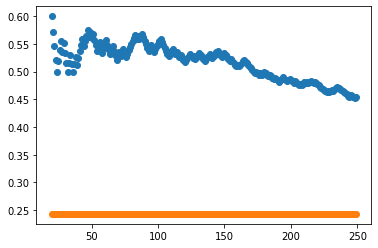

In [34]:
#FISSO WINDOW E MUOVO 
moves = []
p = []
N = len(b12)
A = int(sum(b12['succ8']))
ran = []

for i in range(20,250):
    t = int(sum(b12.sort_values(ascending=False, by = cent)[0:i]['succ8']))
    moves.append(t/i)
    n = i
    p.append(hypergeom_cdf(N, A, n, t, min_value=None))
    ran.append(A/N)
plt.scatter(range(20,250), moves)
plt.scatter(range(20,250), ran)
plt.show()

In [35]:
#FISSO AMPIEZZA SAMPLE, MUOVO ANNO FONDAZIONE

moves = []
p = []
N = len(b12)
A = sum(b12['succ8'])
ran = []
for i in range(2000,2013):
    n = 25
    N = len(b12[b12['foundation']==i])
    A = sum(b12[b12['foundation']==i]['succ8'])
    t = sum(b12[b12['foundation']==i].sort_values(ascending=True, by = cent)[0:n]['succ8'])
    moves.append(t/amp)
    p.append(hypergeom_cdf(N, A, n, t, min_value=None))
    ran.append(A/N)
plt.scatter(range(2000,2013), moves)
plt.scatter(range(2000,2013), ran)
plt.show()

NameError: name 'amp' is not defined

first_money


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17588\3412282562.py:19: RuntimeWarning: overflow encountered in double_scalars
  return (Achoosex)*NAchoosenx/Nchoosen
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17588\3412282562.py:19: RuntimeWarning: invalid value encountered in double_scalars
  return (Achoosex)*NAchoosenx/Nchoosen


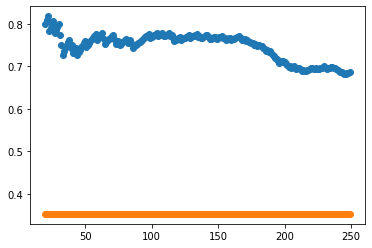

deg_max


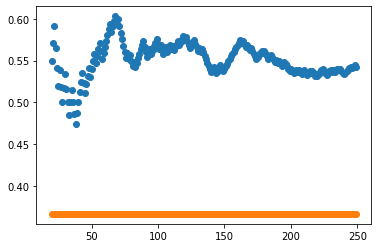

deg_min


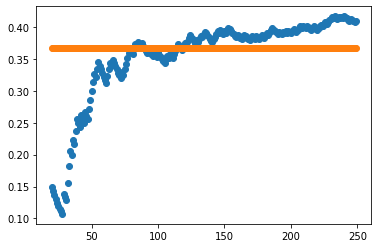

deg_median


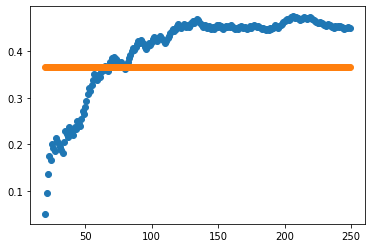

voterank_max


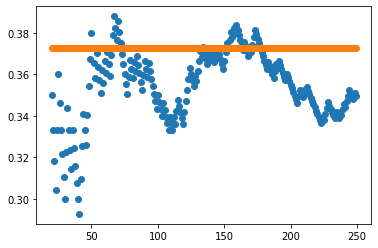

voterank_min


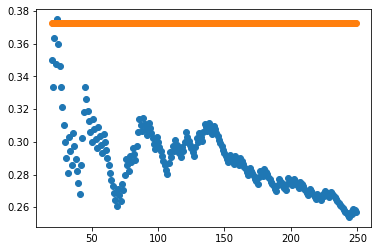

voterank_median


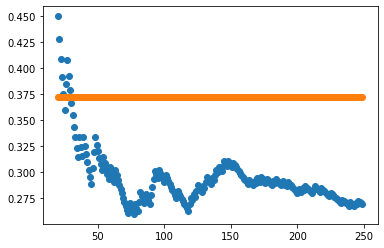

clustering_max


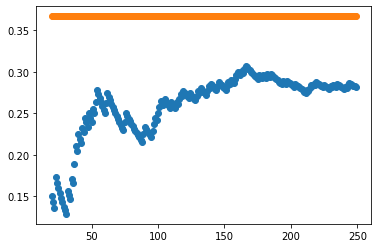

clustering_min


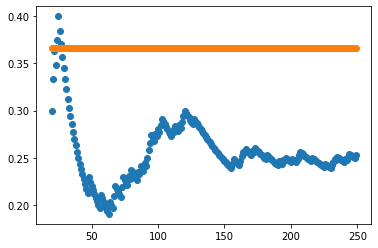

clustering_median


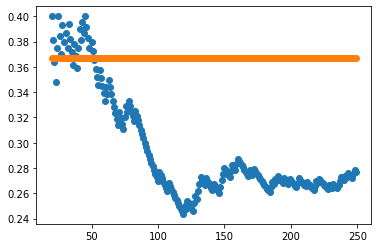

harmonic_centrality_max


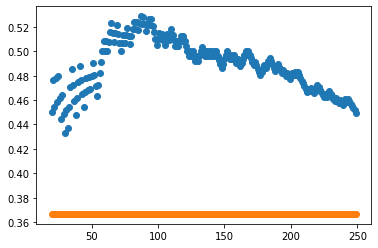

harmonic_centrality_min


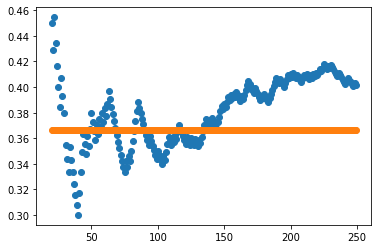

harmonic_centrality_median


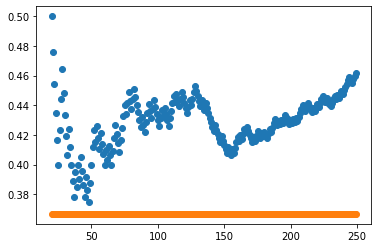

closeness_centrality_max


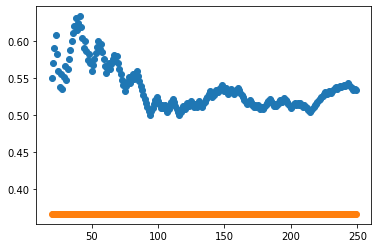

closeness_centrality_min


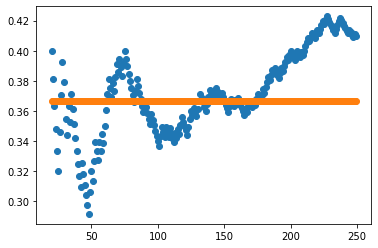

closeness_centrality_median


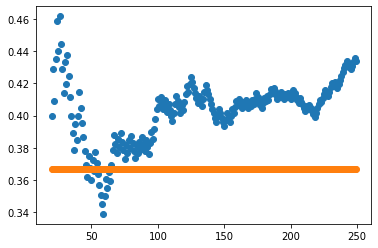

newman_betweenness_centrality_max


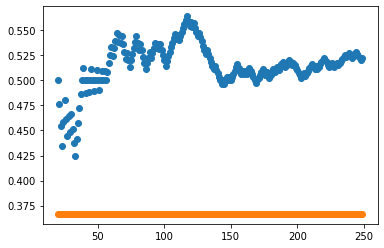

newman_betweenness_centrality_min


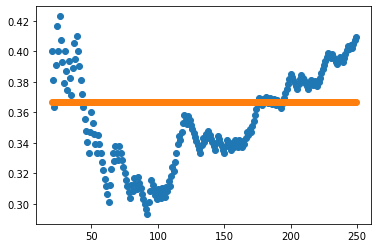

newman_betweenness_centrality_median


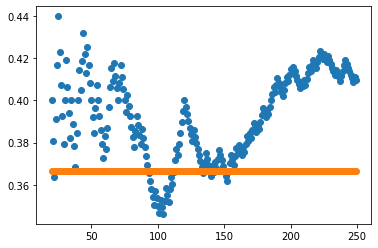

pagerank_max


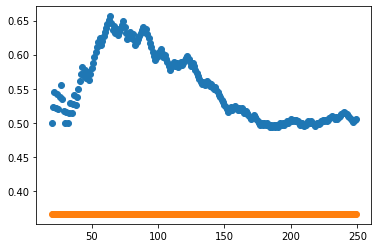

pagerank_min


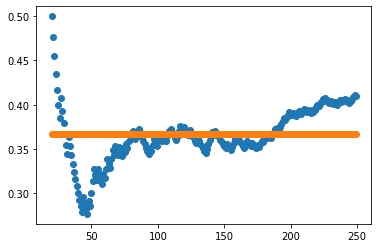

pagerank_median


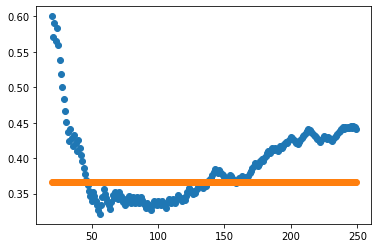

betweenness_centrality_max


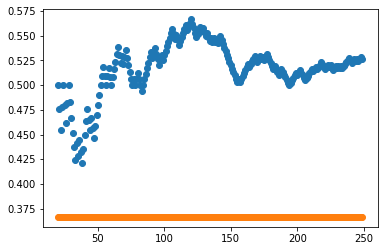

betweenness_centrality_min


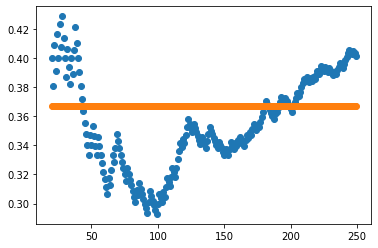

betweenness_centrality_median


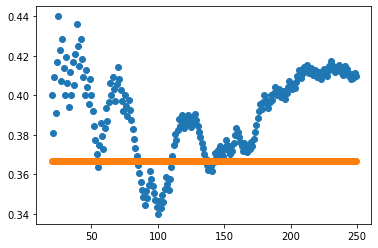

eigenvector_centrality_max


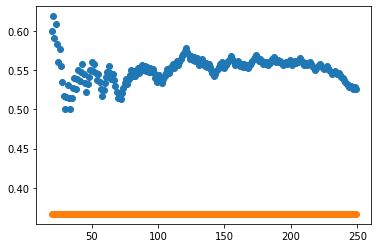

eigenvector_centrality_min


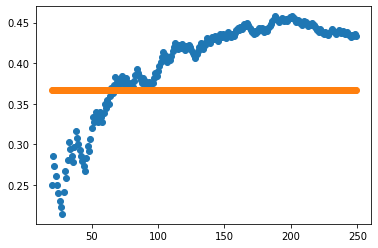

eigenvector_centrality_median


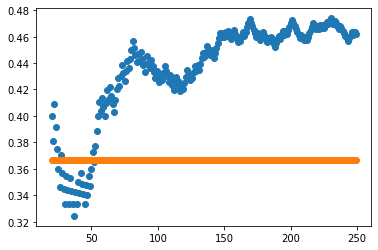

average_neighbor_degree_max


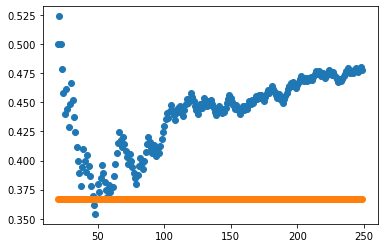

average_neighbor_degree_min


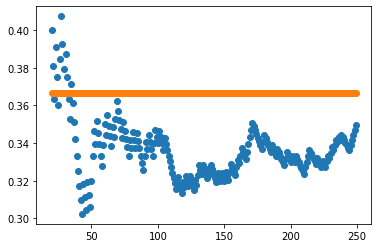

average_neighbor_degree_median


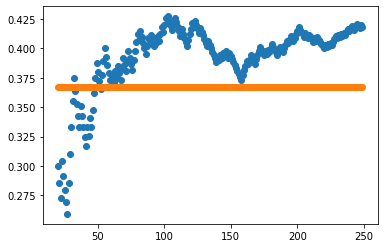

num_inv


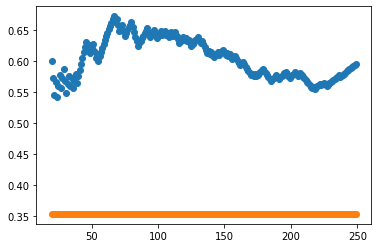

deg_org


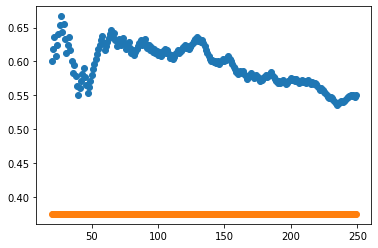

voterank_org


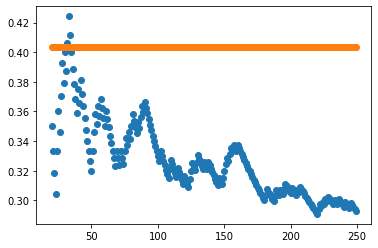

clustering_org


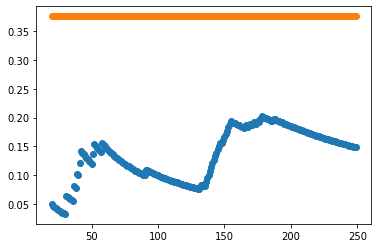

core_number_org


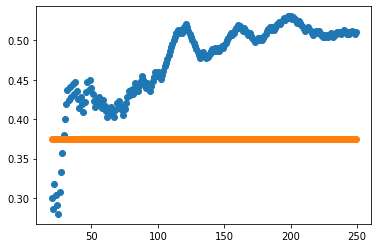

harmonic_centrality_org


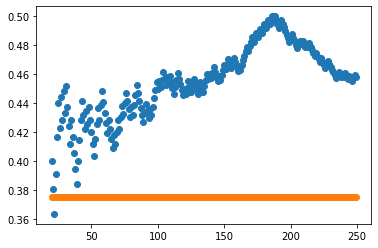

closeness_centrality_org


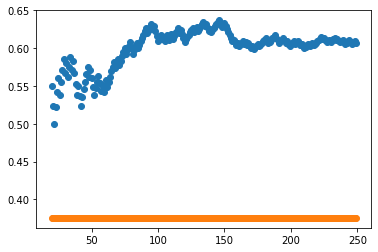

newman_betweenness_centrality_org


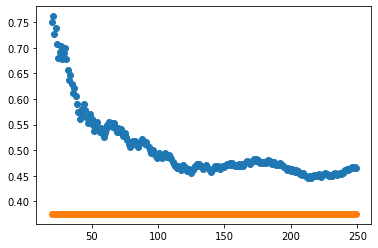

pagerank_org


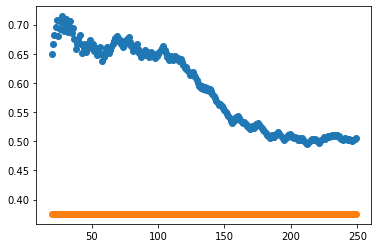

eigenvector_centrality_org


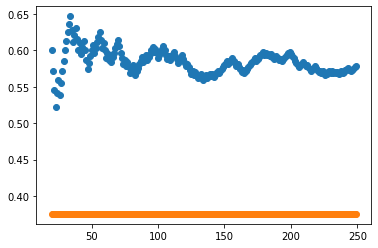

average_neighbor_degree_org


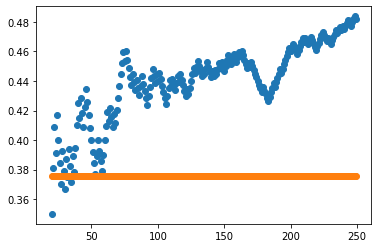

In [192]:
centralities = [bonav.columns[i] for i in [8] + list(range(13,len(bonav.columns)))]
for i in centralities:
    cent = i
    print(cent)
    b12 = bonav3#[bonav3['foundation']<2013]
    #b12 = b12[b12['first_money']<10000000]
    b12 = b12[[cent, 'current_sit','success','stage', 'st8', 'succ12','id', 'node','st8']]
    b12 = b12[b12[cent].notnull()]
    b12 = b12[b12['succ12'].notnull()]
    moves = []
    p = []
    N = len(b12)
    A = int(sum(b12['succ12']))
    ran = []
    for i in range(20,250):
        t = int(sum(b12.sort_values(ascending=False, by = cent)[0:i]['succ12']))
        moves.append(t/i)
        n = i
        p.append(hypergeom_cdf(N, A, n, t, min_value=None))
        ran.append(A/N)
    plt.scatter(range(20,250), moves)
    plt.scatter(range(20,250), ran)
    plt.show()

In [36]:
np.nansum(b12['succ8'])/(len(b12)-sum(pd.isnull(b12['succ8'])))

0.2430025445292621

In [ ]:
len(b12[(b12.first_money>10^6) & (b12.first_money<10^8)])

In [ ]:
for y in range(1995,2021):
    display(orgs[['closeness_centrality' + str(y), 'node', 'country', 'industry']].sort_values(ascending=False, 
                                                                                            by = 'closeness_centrality' + str(y)).iloc[0:30,:])

In [ ]:
b12.sort_values(ascending=False, by = 'closeness_centrality_org')[0:1000]

In [ ]:

sns.set(style='ticks')
_success= [0, 1]
df = pd.DataFrame({
    'centr': (b12[cent]),
    'money': np.log(b12['first_money']),
    'success': b12['succ8']
})

In [ ]:
sns.relplot(data=df, x='eigen', y='money', hue='success', hue_order=_success, aspect=1.61)
plt.show()

In [ ]:
for i in centralities:
    sns.boxplot(x = "succ8", y = i, data = b12)
    plt.show()

In [ ]:
A = nx.nx_agraph.to_agraph(Gorg2005)
H = nx.nx_agraph.from_agraph(A)

In [ ]:
len(stati_8)

In [ ]:
df_st8['st8'][150:180]

## Networkss

In [ ]:
for i in tqdm(range(1994,2021)):
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.node, index=nodes.id).to_dict(), 'name')
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.country, index=nodes.id).to_dict(), 'country')
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.continent, index=nodes.continent).to_dict(), 'continent')
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.industry, index=nodes.id).to_dict(), 'industry')
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.foundation, index=nodes.id).to_dict(), 'foundation')
    nx.set_node_attributes(locals()['Gbid' + str(i)], pd.Series(nodes.bipartite, index=nodes.id).to_dict(), 'bipartite')
    print(i)

In [ ]:
Gbid2015.edges(data = True)

### countries

In [169]:
nx.write_gexf(G, "G.gexf")

In [ ]:
plt.savefig

# INDUSTRIES

In [271]:
#AMONG INDUSTRIES
feat = 'country'
edges = nx.to_pandas_edgelist(Gbid2020)
prova = pd.merge(edges, nodes[[feat, 'id']], how = 'left', left_on = 'source', right_on = 'id' )
prova2 =pd.merge(prova, nodes[[feat, 'id']], how = 'left', left_on = 'target', right_on = 'id' )
weight = []
sub = prova2[[feat+'_x', feat+'_y']]
sub2 = prova2[[feat+'_x', feat+'_y']].drop_duplicates()
sub3 = sub2.dropna()
for i in tqdm(range(0,len(sub3))):
    
    sub4 = sub[((sub[feat+'_x']== sub3[feat+'_x'].values[i]) & (sub[feat+'_y']== sub3[feat+'_y'].values[i]))| ((sub[feat+'_y']== sub3[feat+'_x'].values[i]) & (sub[feat+'_x']== sub3[feat+'_y'].values[i]))  ]
    peso = len(sub4)
    weight.append(peso)
sub3['weight'] = weight
prova3 = pd.merge(prova2, sub3, left_on = [feat+'_x',feat+'_y'], right_on = [feat+'_x', feat+'_y'])
prova4 = prova3[prova3[feat+'_x']<=prova3[feat+'_y']]
prova4['weight_l'] = np.log(prova4['weight']+3)


  0%|          | 0/1129 [00:00<?, ?it/s]

0
100
200
300
400
500
600
700
800
900
1000
1100


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17588\3901680475.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub3['weight'] = weight
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17588\3901680475.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prova4['weight_l'] = np.log(prova4['weight']+3)


{'United States': Text(-3.6515518518167047, 4.994941481270981, 'United States'),
 'United Kingdom': Text(-5.70792872132663, -12.572286676015127, 'United Kingdom'),
 'Japan': Text(-45.239169635547114, 36.1969757574698, 'Japan'),
 'Singapore': Text(-53.73003158881126, -29.48225012648004, 'Singapore'),
 'Switzerland': Text(-55.56210643714696, 22.58064969598404, 'Switzerland'),
 'Netherlands': Text(38.86933013382452, -21.80461781131023, 'Netherlands'),
 'Taiwan': Text(-40.10091731353645, 88.42964743425732, 'Taiwan'),
 'Virgin Islands (British)': Text(-8.09222564837261, -99.71675020385159, 'Virgin Islands (British)'),
 'Germany': Text(18.45732404177116, 8.73680038799887, 'Germany'),
 'Luxembourg': Text(-24.957197414882817, -30.048776653231293, 'Luxembourg'),
 'Italy': Text(-45.910489559653136, -52.38351217156807, 'Italy'),
 'Hong Kong': Text(-17.28133642743791, 36.74487944683086, 'Hong Kong'),
 'South Korea': Text(-68.94594557031942, 47.326703643578234, 'South Korea'),
 'Russian Federation'

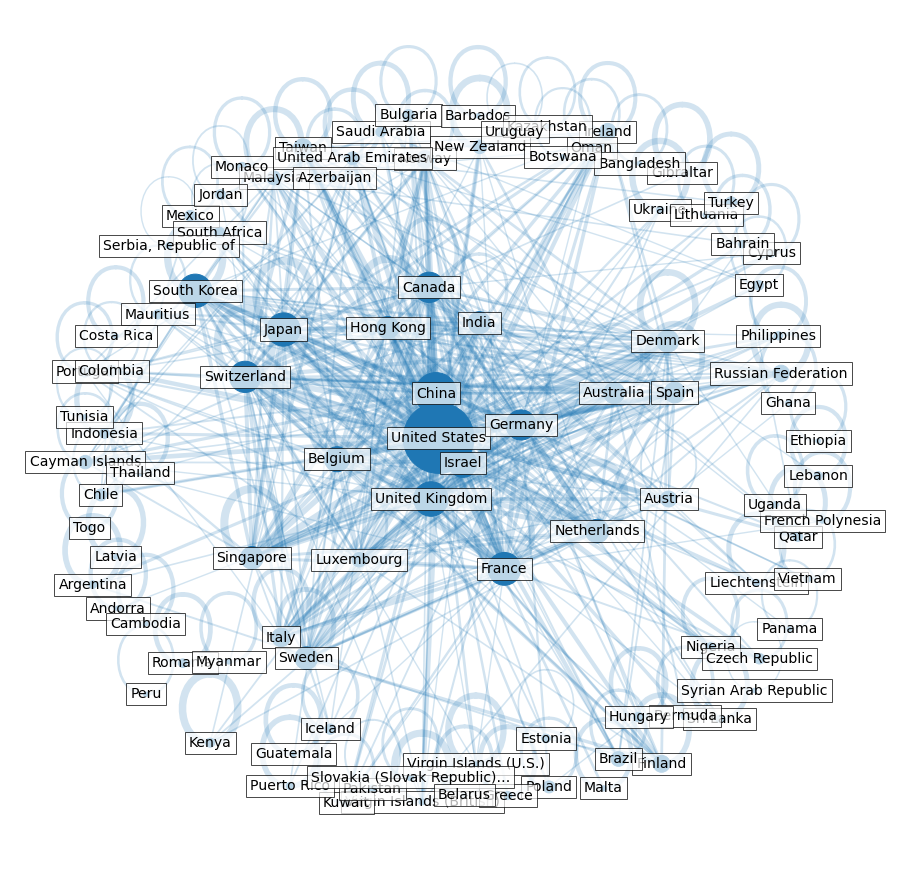

In [300]:
G = nx.from_pandas_edgelist(prova4, feat+'_x', feat+'_y', edge_attr = 'weight_l')
nodebig = [20*np.sqrt(len(prova4[(prova4[(feat +'_x')]== i)| (prova4[(feat +'_x')]== i)])) for i in list(G.nodes())]
nodedeg = [d[k]*30 for k in d]
pos = nx.spring_layout(G, scale=100, k=20/np.sqrt(G.order()))
d = dict(G.degree)
lung = len(G.edges)
edgewidth = [list(list(G.edges(data= True))[i][2].values())[0] for i in range(0,lung-1)]
fig, ax = plt.subplots(figsize=(16, 16))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# Visualize graph components
nx.draw_networkx_edges(G, pos, alpha=0.2, width=edgewidth, edge_color="tab:blue")
nx.draw_networkx_nodes(G, pos, node_size=nodebig, node_color="tab:blue", alpha=1)
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(G, pos, font_size=14, bbox=label_options)

In [266]:
leaderboard = {}
for x in G.nodes:
    leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='connections')
df2 = s.to_frame().sort_values('connections', ascending=False)
df2

,connections
Corporation,30
Venture Capital,29
Corporate Venture,29
Angel Investor (Group),28
Diversified Financial Services,28
Other,28
Non-Profit Foundation,28
Private Equity,27
Asset/Investment Management,27
Investment Bank,27


In [301]:
fig.savefig("investorcountries.png")

# confusion matrix

In [37]:
def extract_window(time_window):
    data_aligned=pd.DataFrame()
    for col in data.columns:
        first_inv_year=data.loc[~data[col].isna(), col].index[0]
        if first_inv_year>1999 and first_inv_year<2021-time_window:
            x=data.loc[first_inv_year:,col].reset_index()
            data_aligned[col]=x[col]
    data_aligned=data_aligned.fillna(0)
    data_aligned=data_aligned.cumsum()
    data_export=data_aligned.loc[0:time_window-1,:]
    return data_export

# We run K-means 100 times per sector in order to "be sure" of clustering partitions
def functional_clustering(data):
    clusters={}
    kmeans=skfda.ml.clustering.KMeans(n_clusters=2, n_init=100)
    for sector in content.industry.unique():
        idx=content[content.industry==sector].id_x
        mat=data.loc[:,data.columns.isin(idx)]
        if mat.shape[1]>1:
            fdmat = skfda.FDataGrid(mat.transpose().to_numpy())
            labels=kmeans.fit_predict(fdmat)
            if kmeans.cluster_centers_.evaluate(0.5)[1]>kmeans.cluster_centers_.evaluate(0.5)[0]:
                for x in zip(mat.columns, labels):
                    clusters[x[0]]=x[1]
            else:
                for x in zip(mat.columns, labels):
                    clusters[x[0]]= 0 if x[1]==1 else 1
    return clusters

In [38]:

data=cb_new[['target_name', 'industry', 'id_x', 'date_y', 'size_real', 'target_founded', 'target_status', 'round_simp']]
data.date_y=data.date_y#.dt.year
a=data.groupby(['round_simp']).count()
a['target_name']=a.target_name/data.shape[0]
remove=['Asset Sale', 'Bridge', 'Dead', 'Debt', 'Distressed & Special Situation', 'Leveraged Buyout', 'Line of Credit', 
 'Loan', 'Management Buyout', 'Milestone Payment', 'Other Investors', 'Portfolio Merger', 'Portfolio NewCo',
 'Secondary Market', 'Shareholder Liquidity']

data=data[data.size_real>0]
#data=data[~data.target_founded.isna()]
data=data[data.date_y<2021]
data=data.loc[data.industry.isna()==False,]
data=data.loc[~data.round_simp.isin(remove)]

content=data[['industry','id_x', 'target_name', 'target_founded', 'target_status']].drop_duplicates()
content['alive']=np.where(content.target_status.isin(['Alive / Active']),1,0)

data=data.groupby(['id_x','target_name','date_y']).mean().reset_index()
data=data.pivot('date_y','id_x','size_real')

 c:\python38\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [40]:
percentage=[]

for size in tqdm(range(5,13)):
    locals()['data_size' + str(size)]= extract_window(size)
    locals()['data_size' + str(size)]= locals()['data_size' + str(size)].loc[:, (locals()['data_size' + str(size)] != locals()['data_size' + str(size)].iloc[0]).any()]
    #data_size = np.log(data_size)
    locals()['clusters'+str(size)] = functional_clustering(locals()['data_size' + str(size)])
    percentage.append(sum(locals()['clusters'+str(size)].values())/len(locals()['clusters'+str(size)].values()))
    print(size)

  0%|          | 0/8 [00:00<?, ?it/s]

 C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18824\1640326975.py:7: PerformanceWarning:DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


5
6
7
8
9
10
11
12


In [50]:
for i in range(5,13):
    locals()['data_size'+str(i)].to_csv('data_size'+str(i)+'.csv')
    pd.DataFrame(locals()['clusters'+str(i)].keys(), locals()['clusters'+str(i)].values()).reset_index().to_csv('clusters'+str(i)+'.csv')

,index,0
0,1,16
1,1,17
2,0,23
3,0,26
4,0,32
...,...,...
1995,0,12307
1996,0,13077
1997,0,13676
1998,0,259


In [381]:
data_size=data_size.loc[:, (data_size != data_size.iloc[0]).any()]
clusters=functional_clustering(data_size)
print('Percentage of successful firms:', 100*sum(clusters.values())/len(clusters.values()), '%')

Percentage of successful firms: 15.0 %


In [412]:
#SUCCESSO CLASSICO 
classic = bonav3[['id','succ10']]
classic = classic[classic['succ10'].notnull()]
classic = dict(zip(classic.id, classic.succ10))
a = clusters10.keys() #take companies present in clusters10
b = classic.keys() #take companies with classic success
c = list(set(a) & set(b)) #intersection
classic = dict((k, classic[k]) for k in c)
new = dict((k, clusters10[k]) for k in c)
y_clas = list(classic.values())
y_new = list(new.values())
#confusion_matrix(y_clas, y_new)

y_actu = pd.Series(y_clas, name='clas')
y_pred = pd.Series(y_new, name='new')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

new,0,1
clas,,
0.0,1225,114
1.0,615,158


In [355]:
import os
os.chdir(r'C:\Users\Marco\Documents\GitHub\crunch_net\ANS\ANS_all')
covariates=pd.read_csv('covariates.csv', index_col=0)
#covariates=covariates.drop(['voterank_max', 'voterank_min', 'voterank_median', 'voterank_org'], axis=1)
#covariates=covariates.drop(['voterank_org'], axis=1)

In [357]:
# Transformations (plotted and chosen individually)
covariates['first_money']=np.log(covariates['first_money'])
covariates['deg_max']=np.log(covariates['deg_max'])
covariates['deg_min']=np.log(covariates['deg_min'])
covariates['deg_median']=np.log(covariates['deg_median'])
covariates['newman_betweenness_centrality_max']=np.log(covariates['newman_betweenness_centrality_max']+0.001)
covariates['newman_betweenness_centrality_min']=np.log(covariates['newman_betweenness_centrality_min']+0.001)
covariates['newman_betweenness_centrality_median']=np.log(covariates['newman_betweenness_centrality_median']+0.001)
covariates['pagerank_max']=np.log(covariates['pagerank_max'])
covariates['pagerank_min']=np.log(covariates['pagerank_min'])
covariates['pagerank_median']=np.log(covariates['pagerank_median'])
covariates['betweenness_centrality_max']=np.log(covariates['betweenness_centrality_max']+0.001)
covariates['betweenness_centrality_min']=np.log(covariates['betweenness_centrality_min']+0.001)
covariates['betweenness_centrality_median']=np.log(covariates['betweenness_centrality_median']+0.001)
covariates['average_neighbor_degree_max']=np.log(covariates['average_neighbor_degree_max'])
covariates['average_neighbor_degree_min']=np.log(covariates['average_neighbor_degree_min'])
covariates['average_neighbor_degree_median']=np.log(covariates['average_neighbor_degree_median'])
covariates['num_inv']=np.log(covariates['num_inv'])
covariates['deg_org']=np.log(covariates['deg_org'])
covariates['core_number_org']=np.log(covariates['core_number_org'])
covariates['newman_betweenness_centrality_org']=np.log(covariates['newman_betweenness_centrality_org']+0.0001)
covariates['pagerank_org']=np.log(covariates['pagerank_org'])

covariates['foundation']=covariates.foundation.apply(str)
covariates['date']=covariates.date.apply(str)

In [360]:
Z=covariates.drop(['node','country','continent','industry','foundation','sector', 'stage', 'first_money', 'date', 'current_sit', 'bipartite','id', 'voterank_org'], axis=1)

Z=Z.dropna()

scaler = preprocessing.StandardScaler().fit(Z)
Z_scaled = scaler.transform(Z)
Z_scaled=pd.DataFrame(Z_scaled)
Z_scaled.columns=Z.columns
Z_scaled.shape

(7921, 40)

In [415]:
cumulate=data_size10.loc[data_size10.shape[0]-1,:]
cumulate=pd.DataFrame(cumulate).reset_index()
cumulate.columns=['idx', 'cum']
#cumulate['diff']=cumulate['cum']-covariates[covariates.id.isin(cumulate.idx)].reset_index().first_money
cumulate['cum']=cumulate.cum.apply(np.log)
covariates['id']=covariates.id.apply(float)

In [416]:
# Scale both X and y
cumulative_merge=pd.merge(cumulate, covariates, left_on='idx', right_on='id')
cumulative_merge.index=cumulative_merge.idx
cumulative_merge=cumulative_merge.drop(['node', 'id', 'bipartite', 'idx'], axis=1)

cat=cumulative_merge.select_dtypes(exclude=['float64', 'int64'])
num=cumulative_merge.select_dtypes(include=['float64', 'int64'])

scaler = preprocessing.StandardScaler().fit(num)
num_scaled = scaler.transform(num)
num_scaled=pd.DataFrame(num_scaled)
num_scaled.columns=num.columns
num_scaled.index=cat.index

cumulative_merge=pd.concat([cat, num_scaled], axis=1)
#cumulative_merge['diff_y']=cumulative_merge.cum-cumulative_merge.first_money

In [417]:
formula='cum ~ deg_min + voterank_min + average_neighbor_degree_max + eigenvector_centrality_max + clustering_org + harmonic_centrality_min + clustering_min + sector + first_money'

In [418]:
results = smf.ols(formula, data=cumulative_merge).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    cum   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     127.3
Date:                Sun, 06 Feb 2022   Prob (F-statistic):          1.83e-228
Time:                        11:37:23   Log-Likelihood:                -1882.8
No. Observations:                1771   AIC:                             3792.
Df Residuals:                    1758   BIC:                             3863.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [461]:
predizione = cumulative_merge[['deg_min','voterank_min','average_neighbor_degree_max','eigenvector_centrality_max','clustering_org','harmonic_centrality_min',
                               'clustering_min','sector','first_money']]
predizione = predizione.dropna()
predizione = results.predict(predizione)
pred =  list(predizione)
a = {'id' : list(predizione.index), 'pred' : pred}
a = pd.DataFrame(a)
classic = bonav3[['id','succ10']]
classic = classic[classic['succ10'].notnull()]
b = pd.merge(a, classic, how = 'inner')
b.sort_values(by=['pred'], ascending=False)

,id,pred,succ10
800,10598,1.510070,1.0
439,8792,1.450069,1.0
252,2466,1.426561,1.0
1051,11914,1.307263,1.0
974,11514,1.292089,0.0
...,...,...,...
1042,11879,-1.810371,0.0
1540,14352,-2.011942,0.0
333,5118,-2.014640,1.0
45,484,-2.217034,0.0


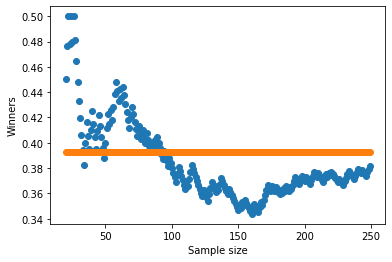

In [474]:
moves = []
p = []
N = len(b)
A = int(sum(b['succ10']))
ran = []
for i in range(20,250):
    t = int(sum(b[0:i]['succ10']))
    moves.append(t/i)
    n = i
    p.append(hypergeom_cdf(N, A, n, t, min_value=None))
    ran.append(A/N)
plt.scatter(range(20,250), moves)
plt.scatter(range(20,250), ran)
plt.xlabel('Sample size')
plt.ylabel('Winners')
plt.savefig('oldnew.jpg')
plt.show()


In [441]:
a

[-2.2207610846819934,
 -2.2170340839769986,
 -2.014640266102421,
 -2.0119424728893143,
 -1.8103711289940398,
 -1.7771655293996624,
 -1.718785960210938,
 -1.6712254390040837,
 -1.668968877685462,
 -1.6492018014589767,
 -1.6466286454065635,
 -1.6466286454065635,
 -1.6400141123313654,
 -1.5984932487642145,
 -1.5915833222677402,
 -1.555024784447964,
 -1.553489245019758,
 -1.5515021693583957,
 -1.550568916638479,
 -1.5476222159846893,
 -1.5464010914542632,
 -1.5383488091979918,
 -1.534591476429087,
 -1.5211513479415977,
 -1.5077139975996783,
 -1.5024687192702373,
 -1.4833320194005863,
 -1.4828414632150533,
 -1.4563351370973832,
 -1.4420709753774497,
 -1.4354115431936598,
 -1.4353858756149598,
 -1.4338219825549856,
 -1.4318413483575883,
 -1.4293489089920592,
 -1.419438132021151,
 -1.4130513023616915,
 -1.4089076608994309,
 -1.4044700029501298,
 -1.4037648869581494,
 -1.4018652090628414,
 -1.389560955032738,
 -1.3749425597627145,
 -1.3743892035539178,
 -1.3628476522828123,
 -1.354603176326596